In [1]:
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point, Polygon

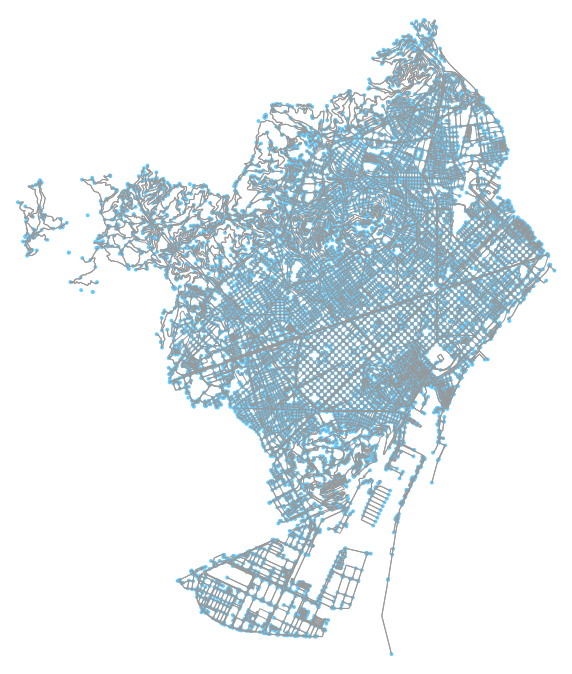

(<Figure size 720x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12644de48>)

In [2]:
G=ox.graph_from_place('Barcelona, Spain', network_type='bike', retain_all=True)
ox.plot_graph(G, fig_height=15, fig_width=10)

In [3]:
city_nodes, city_edges = ox.graph_to_gdfs(G)
print(city_nodes.shape)
print(city_edges.shape)

(18093, 6)
(37441, 20)


In [4]:
city_nodes.head()

,y,x,osmid,highway,ref,geometry
21638832,41.363537,2.183085,21638832,turning_circle,NaN,POINT (2.18309 41.36354)
21638843,41.370365,2.187593,21638843,NaN,NaN,POINT (2.18759 41.37036)
21638845,41.370095,2.187758,21638845,NaN,NaN,POINT (2.18776 41.37009)
21638855,41.374983,2.188831,21638855,NaN,NaN,POINT (2.18883 41.37498)
21638859,41.376347,2.188693,21638859,NaN,NaN,POINT (2.18869 41.37635)


In [5]:
city_edges.head()

,u,v,key,osmid,name,highway,oneway,length,geometry,maxspeed,access,service,lanes,ref,width,tunnel,est_width,bridge,junction,area
0,21638832,1259351831,0,23430836,Passeig de l'Escullera,service,False,218.209,"LINESTRING (2.18309 41.36354, 2.18300 41.36347...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21638843,4931844334,0,502812532,NaN,service,False,9.721,"LINESTRING (2.18759 41.37036, 2.18748 41.37038)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21638843,21638845,0,4079500,Passeig de Joan de Borbó,residential,False,33.171,"LINESTRING (2.18759 41.37036, 2.18763 41.37028...",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21638843,1404092135,0,"[543357596, 423227070]",Passeig de Joan de Borbó,residential,False,244.776,"LINESTRING (2.18759 41.37036, 2.18761 41.37054...",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21638845,885308258,0,554707785,Passeig de Joan de Borbó,residential,False,28.718,"LINESTRING (2.18776 41.37009, 2.18771 41.36984)",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


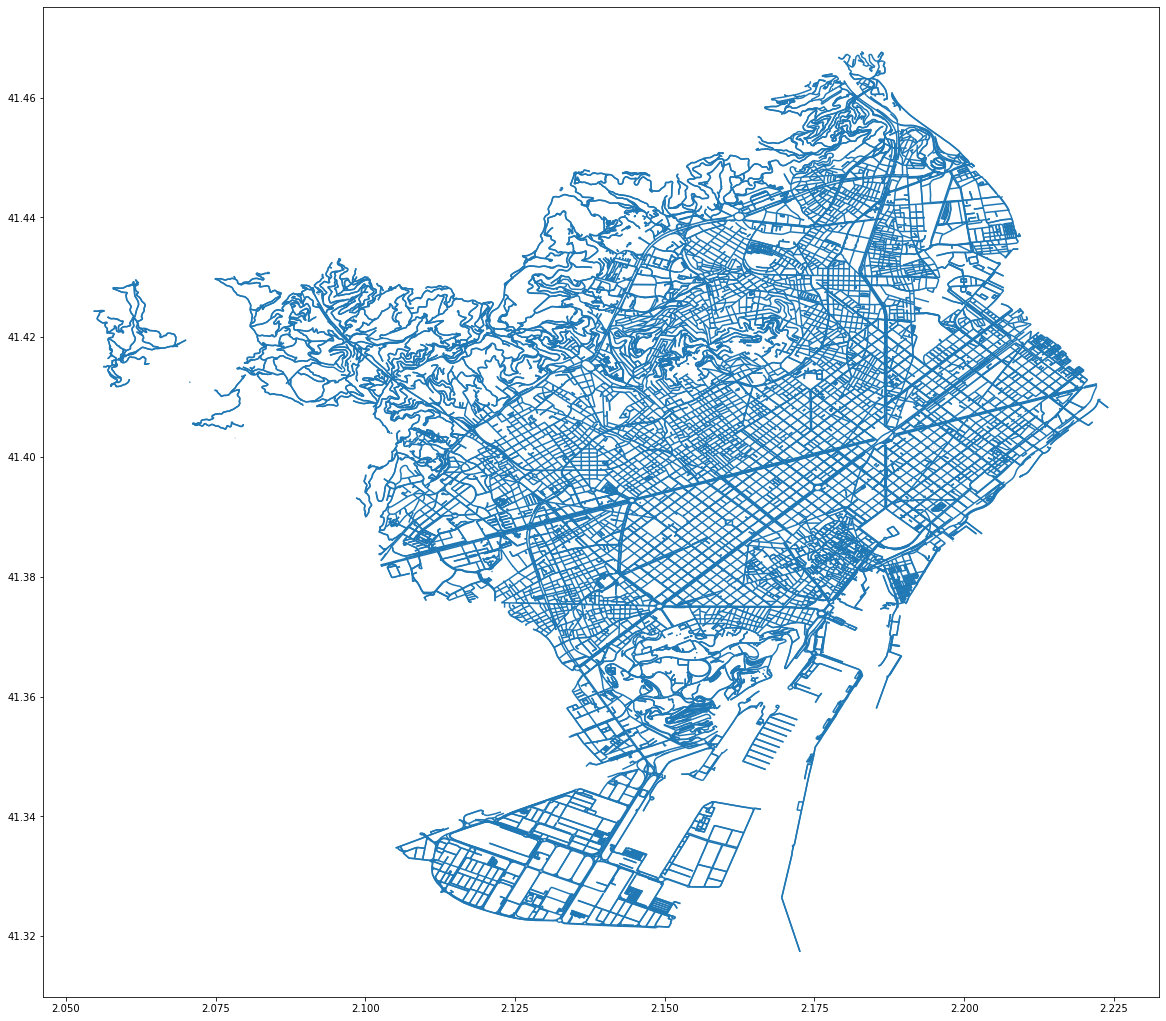

In [6]:
city_edges.geometry.plot(figsize=(20,20))

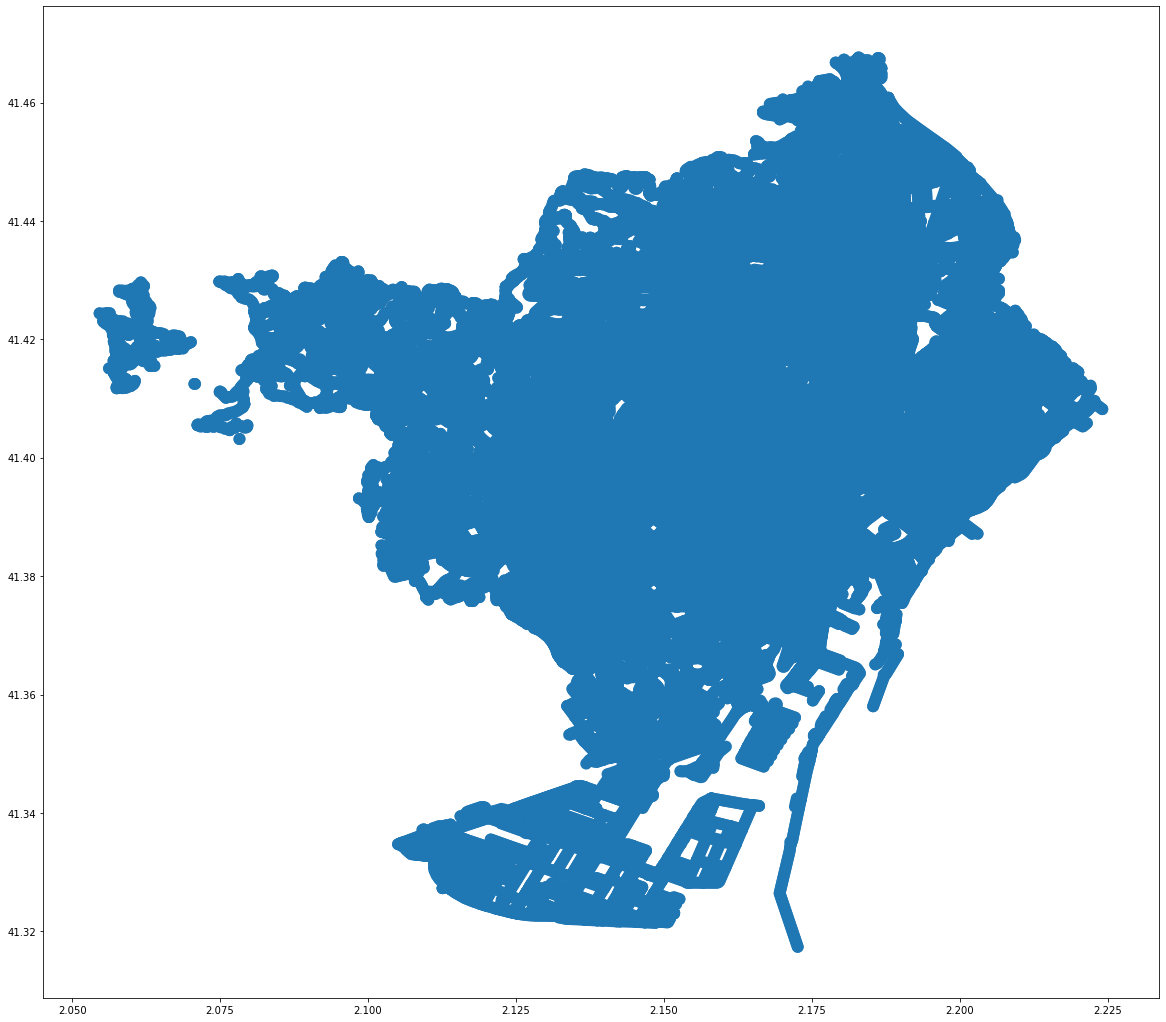

In [7]:
city_edges['geometry'].buffer(0.001).plot(figsize=(20,20));

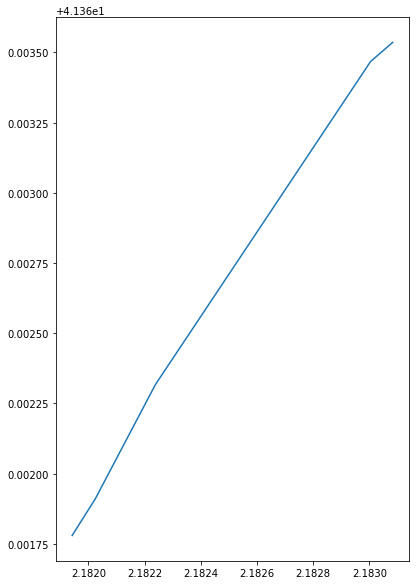

In [8]:
city_edges['geometry'][0:1].plot(figsize=(10, 10));

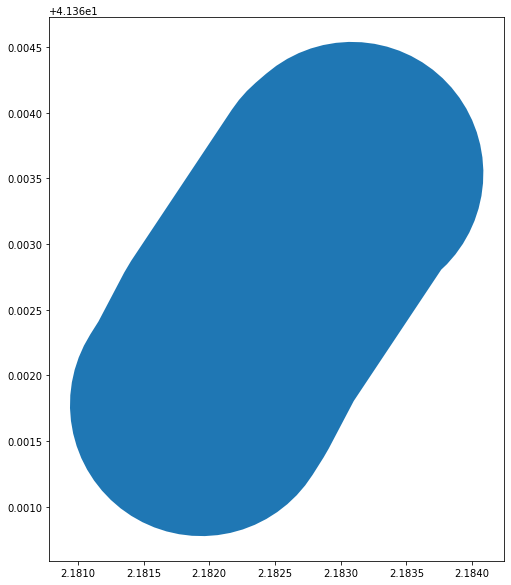

In [9]:
city_edges['geometry'][0:1].buffer(0.001).plot(figsize=(10,10));

In [10]:
city_edges['buffer_geometry']=city_edges['geometry'].buffer(0.001)

In [11]:
city_edges.head()

,u,v,key,osmid,name,highway,oneway,length,geometry,maxspeed,...,service,lanes,ref,width,tunnel,est_width,bridge,junction,area,buffer_geometry
0,21638832,1259351831,0,23430836,Passeig de l'Escullera,service,False,218.209,"LINESTRING (2.18309 41.36354, 2.18300 41.36347...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((2.18376 41.36281, 2.18310 41.36181, ..."
1,21638843,4931844334,0,502812532,NaN,service,False,9.721,"LINESTRING (2.18759 41.37036, 2.18748 41.37038)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((2.18738 41.36938, 2.18728 41.36940, ..."
2,21638843,21638845,0,4079500,Passeig de Joan de Borbó,residential,False,33.171,"LINESTRING (2.18759 41.37036, 2.18763 41.37028...",30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((2.18685 41.36966, 2.18680 41.36973, ..."
3,21638843,1404092135,0,"[543357596, 423227070]",Passeig de Joan de Borbó,residential,False,244.776,"LINESTRING (2.18759 41.37036, 2.18761 41.37054...",30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((2.18662 41.37065, 2.18663 41.37070, ..."
4,21638845,885308258,0,554707785,Passeig de Joan de Borbó,residential,False,28.718,"LINESTRING (2.18776 41.37009, 2.18771 41.36984)",30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((2.18869 41.36964, 2.18866 41.36955, ..."


In [12]:
city_edges.crs

'+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'